In [110]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Loading Preprocessed file
df = pd.read_csv('./preprocess/preprocess_4.csv')
df.head()

,Age,Gender,Salary,Total Business Value,Quarterly Rating,Attrition,WorkingDays,City_C10,City_C11,City_C12,...,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5,Difference_Designation_1,Difference_Designation_2,Difference_Designation_3,Difference_Designation_4
0,28,1,57387,571860.0,2.0,1,78,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1,67016,0.0,1.0,0,25,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,43,1,65603,70000.0,1.0,1,141,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,29,1,46368,40120.0,1.0,1,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,0,78728,253000.0,1.6,0,123,0,1,0,...,0,0,0,1,0,0,0,0,0,0


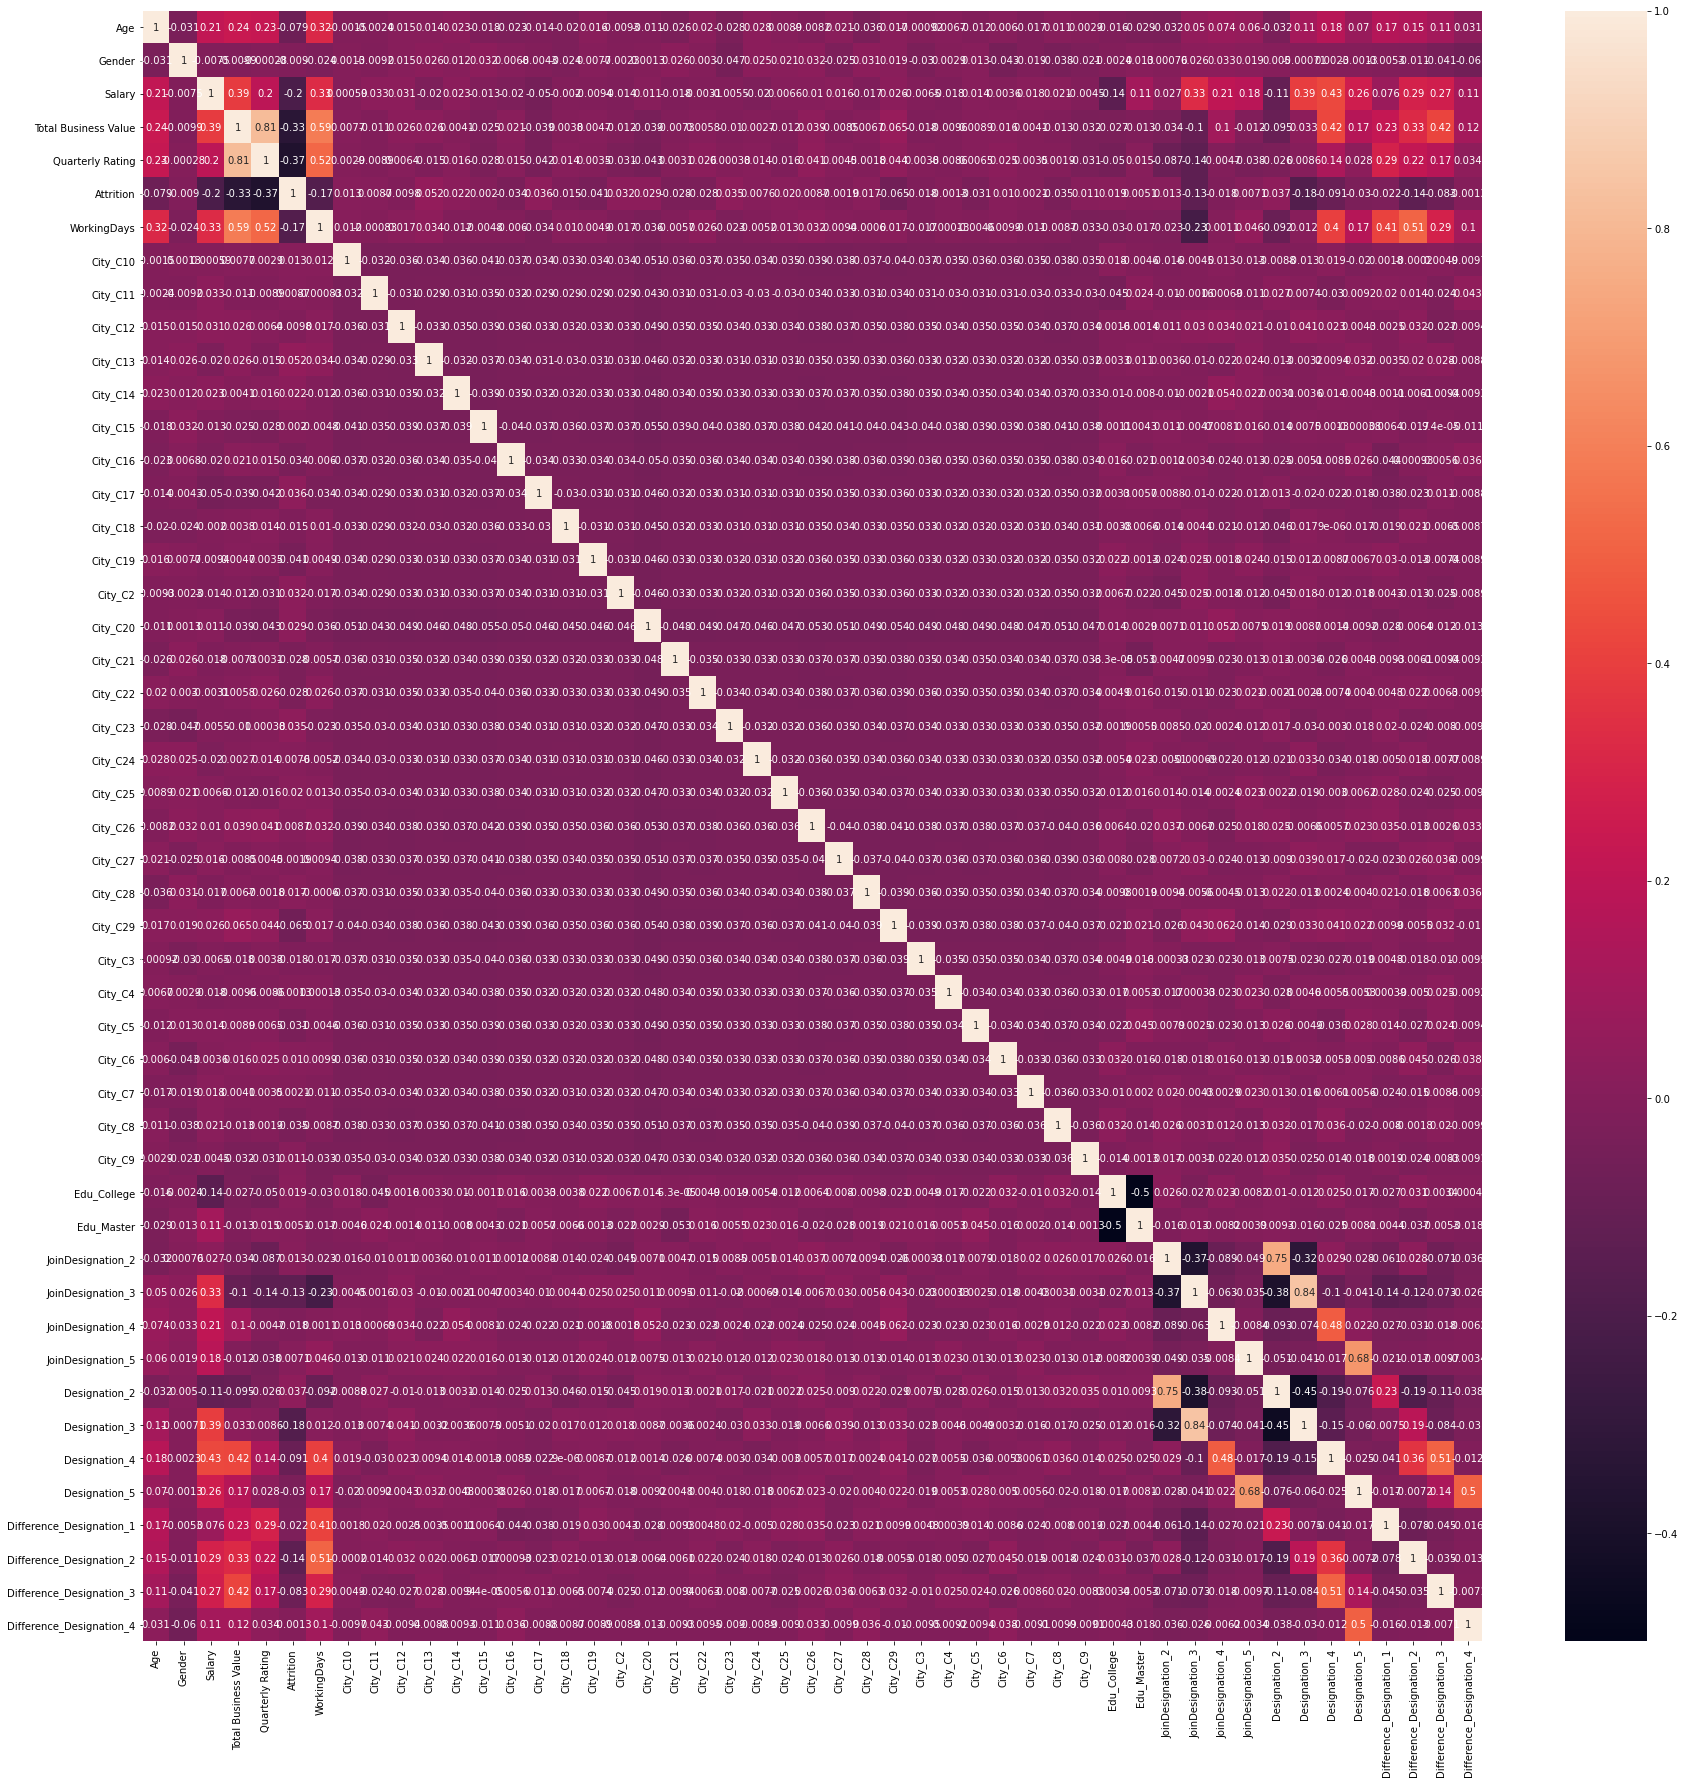

In [22]:
# Correlation
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [166]:
X = df.drop('Attrition', 1)
y = df['Attrition']

In [174]:
y.tail()

2376    0
2377    1
2378    1
2379    1
2380    0
Name: Attrition, dtype: int64

In [167]:
print(X.shape, y.shape)

(2381, 48) (2381,)


Splitting Data into Training and Testing Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [25]:
num_vars = ['Age', 'Salary', 'Total Business Value', 'Quarterly Rating', 'WorkingDays']

In [26]:
Scaler = StandardScaler()

In [27]:
# Scaling Numerical variables
X_train[num_vars] = Scaler.fit_transform(X_train[num_vars])

In [176]:
y_train.tail()

350     0
1930    1
79      0
1859    1
1544    1
Name: Attrition, dtype: int64

In [28]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1618
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -842.01
Date:                Sat, 20 Nov 2021   Deviance:                       1684.0
Time:                        16:55:31   Pearson chi2:                 1.68e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4285      0.364      3.922      0.000       0.715       2.142
Age                          0.0769      0.066      1.164      0.244      -0.053       0.206
Gender                       0.0117      0.124      0.094      0.925      -0.232       0.255
Salary                      -0.0946      0.093     -1.021      0.307      -0.276       0.087
Total Business Value         0.0733      0.145      0.505      0.613      -0.211       0.358
Quarterly Rating            -1.0417      0.129     -8.102      0.000      -1.294      -0.790
WorkingDays                  0.0590      0.097      0.606      0.545      -0.132       0.250
City_C10                     0.2903      0.459      0.632      0.528      -0.610       1.191
City_C11                     0.2825      0.511      0.552      0.581      -0.720       1.285
City_C12                     0.2239      0.442      0.507      0.612      -0.642       1.090
City_C13                     0.8945      0.535      1.670      0.095      -0.155       1.944
City_C14                     0.5218      0.481      1.085      0.278      -0.421       1.464
City_C15                    -0.0679      0.435     -0.156      0.876      -0.921       0.786
City_C16                    -0.1378      0.444     -0.310      0.756      -1.008       0.733
City_C17                    -0.0084      0.462     -0.018      0.986      -0.913       0.897
City_C18                     0.0591      0.500      0.118      0.906      -0.921       1.040
City_C19                    -0.5340      0.457     -1.168      0.243      -1.430       0.362
City_C2                      0.7586      0.510      1.488      0.137      -0.241       1.758
City_C20                     0.3306      0.400      0.827      0.408      -0.453       1.114
City_C21                    -0.1939      0.447     -0.434      0.665      -1.070       0.682
City_C22                    -0.2410      0.440     -0.548      0.584      -1.103       0.621
City_C23                     0.6597      0.494      1.335      0.182      -0.309       1.628
City_C24                     0.3831      0.474      0.809      0.419      -0.545       1.311
City_C25                     0.1652      0.465      0.356      0.722      -0.745       1.076
City_C26                     0.2114      0.440      0.480      0.631      -0.652       1.075
City_C27                     0.0580      0.431      0.135      0.893      -0.786       0.902
City_C28                     0.4228      0.468      0.904      0.366      -0.494       1.340
City_C29                    -0.1298      0.438     -0.296      0.767      -0.989       0.729
City_C3                      0.0923      0.456      0.202      0.840      -0.802       0.987
City_C4                      0.0799      0.467      0.171      0.864      -0.835       0.995
City_C5       

In [31]:
# Recursive Feature Elimination
rfe = RFE(LogisticRegression(), 20)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False False  True False False
 False  True False False  True  True False False  True False False False
 False  True False False False False False False False False  True  True
  True  True False False  True  True False False  True  True False False]
[ 1  1  1  1  1  1  4 14 15  1  3  8 27  1 19 18  1  1 29 28  1  7  6  2
 13  1 12 26 10 20  5 11 16  9  1  1  1  1 23 24  1  1 17 21  1  1 22 25]


In [33]:
col = X.columns[rfe.support_]

In [42]:
print(col)

Index(['Age', 'Gender', 'Salary', 'Total Business Value', 'Quarterly Rating',
       'WorkingDays', 'City_C13', 'City_C17', 'City_C2', 'City_C20',
       'City_C23', 'City_C28', 'Edu_College', 'Edu_Master',
       'JoinDesignation_2', 'JoinDesignation_3', 'Designation_2',
       'Designation_3', 'Difference_Designation_1',
       'Difference_Designation_2'],
      dtype='object')


In [38]:
logm2 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1645
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.10
Date:                Sat, 20 Nov 2021   Deviance:                       1708.2
Time:                        17:15:27   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2145      0.162      7.503      0.000       0.897       1.532
Age                          0.0649      0.065      1.004      0.315      -0.062       0.191
Gender                       0.0037      0.122      0.030      0.976      -0.235       0.242
Salary                      -0.2070      0.079     -2.630      0.009      -0.361      -0.053
Total Business Value        -0.1210      0.120     -1.013      0.311      -0.355       0.113
Quarterly Rating            -0.8721      0.109     -8.017      0.000      -1.085      -0.659
WorkingDays                  0.0053      0.091      0.058      0.954      -0.173       0.183
City_C13                     0.8557      0.432      1.979      0.048       0.008       1.703
City_C17                    -0.0282      0.335     -0.084      0.933      -0.685       0.629
City_C2                      0.7874      0.403      1.954      0.051      -0.002       1.577
City_C20                     0.2926      0.247      1.183      0.237      -0.192       0.777
City_C23                     0.6119      0.377      1.622      0.105      -0.127       1.351
City_C28                     0.3930      0.344      1.144      0.253      -0.280       1.066
Edu_College                  0.0953      0.148      0.644      0.520      -0.195       0.385
Edu_Master                   0.1267      0.146      0.866      0.387      -0.160       0.414
JoinDesignation_2           -0.0285      0.229     -0.125      0.901      -0.477       0.420
JoinDesignation_3           -1.2093      0.356     -3.398      0.001      -1.907      -0.512
Designation_2               -0.5141      0.248     -2.075      0.038      -1.000      -0.029
Designation_3               -0.0608      0.319     -0.191      0.849      -0.686       0.564
Difference_Designation_1     0.5726      0.290      1.977      0.048       0.005       1.140
Difference_Designation_2    -0.5986      0.344     -1.739      0.082      -1.273       0.076
============================================================================================
"""

In [39]:
# Calculate VIF
def vif_fn(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [41]:
X = X_train[col]
vif_fn(X)

,Features,VIF
17,Designation_3,8.55
15,JoinDesignation_3,8.24
16,Designation_2,6.65
14,JoinDesignation_2,5.65
3,Total Business Value,3.94
4,Quarterly Rating,3.48
5,WorkingDays,2.54
18,Difference_Designation_1,2.28
19,Difference_Designation_2,2.14
1,Gender,1.94


In [43]:
# Dropping variable with high VIF value
col = col.drop('JoinDesignation_2')

In [44]:
logm3 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1646
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.11
Date:                Sat, 20 Nov 2021   Deviance:                       1708.2
Time:                        17:21:22   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2112      0.160      7.589      0.000       0.898       1.524
Age                          0.0651      0.065      1.009      0.313      -0.061       0.192
Gender                       0.0031      0.122      0.025      0.980      -0.235       0.242
Salary                      -0.2086      0.078     -2.683      0.007      -0.361      -0.056
Total Business Value        -0.1238      0.118     -1.053      0.292      -0.354       0.107
Quarterly Rating            -0.8690      0.106     -8.199      0.000      -1.077      -0.661
WorkingDays                  0.0044      0.091      0.049      0.961      -0.173       0.182
City_C13                     0.8565      0.432      1.981      0.048       0.009       1.704
City_C17                    -0.0277      0.335     -0.083      0.934      -0.685       0.629
City_C2                      0.7880      0.403      1.956      0.051      -0.002       1.578
City_C20                     0.2934      0.247      1.187      0.235      -0.191       0.778
City_C23                     0.6111      0.377      1.621      0.105      -0.128       1.350
City_C28                     0.3934      0.343      1.146      0.252      -0.280       1.066
Edu_College                  0.0956      0.148      0.646      0.518      -0.194       0.386
Edu_Master                   0.1273      0.146      0.870      0.385      -0.160       0.414
JoinDesignation_3           -1.1948      0.336     -3.551      0.000      -1.854      -0.535
Designation_2               -0.5377      0.160     -3.357      0.001      -0.852      -0.224
Designation_3               -0.0716      0.307     -0.233      0.816      -0.674       0.530
Difference_Designation_1     0.5886      0.259      2.270      0.023       0.080       1.097
Difference_Designation_2    -0.5985      0.344     -1.738      0.082      -1.274       0.077
============================================================================================
"""

In [45]:
vif_fn(X_train[col])

,Features,VIF
16,Designation_3,7.48
14,JoinDesignation_3,7.20
3,Total Business Value,3.80
4,Quarterly Rating,3.28
5,WorkingDays,2.51
18,Difference_Designation_2,2.14
15,Designation_2,1.91
1,Gender,1.91
17,Difference_Designation_1,1.79
2,Salary,1.69


In [46]:
col = col.drop('Designation_3')

In [47]:
logm4 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1647
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.14
Date:                Sat, 20 Nov 2021   Deviance:                       1708.3
Time:                        17:22:24   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2055      0.158      7.648      0.000       0.897       1.514
Age                          0.0656      0.065      1.016      0.310      -0.061       0.192
Gender                       0.0050      0.121      0.042      0.967      -0.233       0.243
Salary                      -0.2090      0.078     -2.689      0.007      -0.361      -0.057
Total Business Value        -0.1213      0.117     -1.036      0.300      -0.351       0.108
Quarterly Rating            -0.8721      0.105     -8.291      0.000      -1.078      -0.666
WorkingDays                  0.0068      0.090      0.075      0.940      -0.170       0.183
City_C13                     0.8527      0.432      1.973      0.048       0.006       1.700
City_C17                    -0.0293      0.335     -0.088      0.930      -0.686       0.627
City_C2                      0.7906      0.403      1.963      0.050       0.001       1.580
City_C20                     0.2922      0.247      1.182      0.237      -0.192       0.777
City_C23                     0.6115      0.377      1.622      0.105      -0.128       1.351
City_C28                     0.3952      0.343      1.151      0.250      -0.278       1.068
Edu_College                  0.0953      0.148      0.644      0.519      -0.195       0.385
Edu_Master                   0.1283      0.146      0.877      0.380      -0.158       0.415
JoinDesignation_3           -1.2596      0.190     -6.636      0.000      -1.632      -0.888
Designation_2               -0.5294      0.156     -3.390      0.001      -0.835      -0.223
Difference_Designation_1     0.5705      0.247      2.306      0.021       0.086       1.056
Difference_Designation_2    -0.6360      0.304     -2.089      0.037      -1.233      -0.039
============================================================================================
"""

In [48]:
vif_fn(X_train[col])

,Features,VIF
3,Total Business Value,3.77
4,Quarterly Rating,3.24
5,WorkingDays,2.49
1,Gender,1.91
15,Designation_2,1.85
14,JoinDesignation_3,1.79
2,Salary,1.69
12,Edu_College,1.65
16,Difference_Designation_1,1.60
17,Difference_Designation_2,1.59


In [49]:
col = col.drop('Gender')

In [50]:
logm5 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1648
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.14
Date:                Sat, 20 Nov 2021   Deviance:                       1708.3
Time:                        17:23:36   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2083      0.142      8.490      0.000       0.929       1.487
Age                          0.0654      0.064      1.015      0.310      -0.061       0.192
Salary                      -0.2090      0.078     -2.690      0.007      -0.361      -0.057
Total Business Value        -0.1214      0.117     -1.037      0.300      -0.351       0.108
Quarterly Rating            -0.8719      0.105     -8.298      0.000      -1.078      -0.666
WorkingDays                  0.0066      0.090      0.074      0.941      -0.170       0.183
City_C13                     0.8531      0.432      1.974      0.048       0.006       1.700
City_C17                    -0.0294      0.335     -0.088      0.930      -0.686       0.627
City_C2                      0.7904      0.403      1.962      0.050       0.001       1.580
City_C20                     0.2919      0.247      1.181      0.238      -0.192       0.776
City_C23                     0.6111      0.377      1.621      0.105      -0.128       1.350
City_C28                     0.3956      0.343      1.152      0.249      -0.277       1.068
Edu_College                  0.0954      0.148      0.645      0.519      -0.195       0.385
Edu_Master                   0.1284      0.146      0.878      0.380      -0.158       0.415
JoinDesignation_3           -1.2595      0.190     -6.636      0.000      -1.631      -0.887
Designation_2               -0.5294      0.156     -3.390      0.001      -0.835      -0.223
Difference_Designation_1     0.5707      0.247      2.307      0.021       0.086       1.056
Difference_Designation_2    -0.6357      0.304     -2.089      0.037      -1.232      -0.039
============================================================================================
"""

In [51]:
col = col.drop('WorkingDays')

In [52]:
logm6 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1649
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.14
Date:                Sat, 20 Nov 2021   Deviance:                       1708.3
Time:                        17:24:15   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2092      0.142      8.523      0.000       0.931       1.487
Age                          0.0664      0.063      1.049      0.294      -0.058       0.190
Salary                      -0.2082      0.077     -2.706      0.007      -0.359      -0.057
Total Business Value        -0.1199      0.115     -1.042      0.297      -0.345       0.106
Quarterly Rating            -0.8712      0.105     -8.325      0.000      -1.076      -0.666
City_C13                     0.8537      0.432      1.976      0.048       0.007       1.701
City_C17                    -0.0287      0.335     -0.086      0.932      -0.685       0.628
City_C2                      0.7900      0.403      1.961      0.050       0.001       1.579
City_C20                     0.2916      0.247      1.180      0.238      -0.193       0.776
City_C23                     0.6099      0.377      1.619      0.105      -0.128       1.348
City_C28                     0.3948      0.343      1.151      0.250      -0.278       1.067
Edu_College                  0.0953      0.148      0.644      0.520      -0.195       0.385
Edu_Master                   0.1284      0.146      0.878      0.380      -0.158       0.415
JoinDesignation_3           -1.2633      0.183     -6.913      0.000      -1.621      -0.905
Designation_2               -0.5317      0.153     -3.476      0.001      -0.831      -0.232
Difference_Designation_1     0.5781      0.226      2.555      0.011       0.135       1.022
Difference_Designation_2    -0.6262      0.276     -2.268      0.023      -1.167      -0.085
============================================================================================
"""

In [53]:
col = col.drop('City_C17')

In [54]:
logm7 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1650
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.14
Date:                Sat, 20 Nov 2021   Deviance:                       1708.3
Time:                        17:24:54   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2079      0.141      8.566      0.000       0.931       1.484
Age                          0.0664      0.063      1.049      0.294      -0.058       0.190
Salary                      -0.2078      0.077     -2.706      0.007      -0.358      -0.057
Total Business Value        -0.1200      0.115     -1.043      0.297      -0.345       0.105
Quarterly Rating            -0.8710      0.105     -8.324      0.000      -1.076      -0.666
City_C13                     0.8549      0.432      1.980      0.048       0.009       1.701
City_C2                      0.7911      0.403      1.965      0.049       0.002       1.580
City_C20                     0.2927      0.247      1.186      0.236      -0.191       0.776
City_C23                     0.6110      0.376      1.623      0.104      -0.127       1.349
City_C28                     0.3959      0.343      1.155      0.248      -0.276       1.068
Edu_College                  0.0956      0.148      0.647      0.518      -0.194       0.385
Edu_Master                   0.1285      0.146      0.879      0.380      -0.158       0.415
JoinDesignation_3           -1.2633      0.183     -6.913      0.000      -1.622      -0.905
Designation_2               -0.5319      0.153     -3.478      0.001      -0.832      -0.232
Difference_Designation_1     0.5789      0.226      2.561      0.010       0.136       1.022
Difference_Designation_2    -0.6263      0.276     -2.268      0.023      -1.168      -0.085
============================================================================================
"""

In [55]:
col = col.drop('Edu_College')

In [56]:
logm8 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1651
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.35
Date:                Sat, 20 Nov 2021   Deviance:                       1708.7
Time:                        17:25:55   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2516      0.124     10.080      0.000       1.008       1.495
Age                          0.0656      0.063      1.038      0.299      -0.058       0.190
Salary                      -0.2130      0.076     -2.791      0.005      -0.363      -0.063
Total Business Value        -0.1165      0.115     -1.015      0.310      -0.341       0.108
Quarterly Rating            -0.8743      0.105     -8.364      0.000      -1.079      -0.669
City_C13                     0.8538      0.432      1.978      0.048       0.008       1.700
City_C2                      0.7886      0.403      1.958      0.050      -0.001       1.578
City_C20                     0.2962      0.247      1.200      0.230      -0.188       0.780
City_C23                     0.6057      0.375      1.614      0.107      -0.130       1.341
City_C28                     0.3912      0.343      1.142      0.254      -0.280       1.063
Edu_Master                   0.0829      0.128      0.646      0.518      -0.169       0.335
JoinDesignation_3           -1.2576      0.182     -6.893      0.000      -1.615      -0.900
Designation_2               -0.5274      0.153     -3.453      0.001      -0.827      -0.228
Difference_Designation_1     0.5786      0.226      2.560      0.010       0.136       1.022
Difference_Designation_2    -0.6178      0.276     -2.240      0.025      -1.158      -0.077
============================================================================================
"""

In [57]:
col = col.drop('Edu_Master')

In [58]:
logm9 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1652
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.56
Date:                Sat, 20 Nov 2021   Deviance:                       1709.1
Time:                        17:26:45   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2799      0.116     11.002      0.000       1.052       1.508
Age                          0.0626      0.063      0.993      0.321      -0.061       0.186
Salary                      -0.2050      0.075     -2.721      0.007      -0.353      -0.057
Total Business Value        -0.1231      0.114     -1.076      0.282      -0.347       0.101
Quarterly Rating            -0.8693      0.104     -8.341      0.000      -1.074      -0.665
City_C13                     0.8463      0.431      1.962      0.050       0.001       1.692
City_C2                      0.7802      0.402      1.939      0.053      -0.009       1.569
City_C20                     0.2943      0.247      1.192      0.233      -0.190       0.778
City_C23                     0.6071      0.375      1.618      0.106      -0.128       1.342
City_C28                     0.3955      0.342      1.155      0.248      -0.276       1.067
JoinDesignation_3           -1.2594      0.182     -6.904      0.000      -1.617      -0.902
Designation_2               -0.5250      0.153     -3.438      0.001      -0.824      -0.226
Difference_Designation_1     0.5729      0.226      2.538      0.011       0.130       1.015
Difference_Designation_2    -0.6271      0.276     -2.276      0.023      -1.167      -0.087
============================================================================================
"""

In [59]:
col = col.drop('Age')

In [60]:
logm10 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1653
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -855.06
Date:                Sat, 20 Nov 2021   Deviance:                       1710.1
Time:                        17:27:37   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2765      0.116     10.975      0.000       1.049       1.504
Salary                      -0.1987      0.075     -2.653      0.008      -0.346      -0.052
Total Business Value        -0.1164      0.114     -1.022      0.307      -0.340       0.107
Quarterly Rating            -0.8642      0.104     -8.316      0.000      -1.068      -0.661
City_C13                     0.8500      0.430      1.975      0.048       0.006       1.694
City_C2                      0.7847      0.403      1.949      0.051      -0.005       1.574
City_C20                     0.2952      0.247      1.196      0.232      -0.189       0.779
City_C23                     0.6047      0.375      1.612      0.107      -0.130       1.340
City_C28                     0.3864      0.342      1.130      0.258      -0.284       1.057
JoinDesignation_3           -1.2531      0.182     -6.884      0.000      -1.610      -0.896
Designation_2               -0.5257      0.153     -3.445      0.001      -0.825      -0.227
Difference_Designation_1     0.5945      0.225      2.647      0.008       0.154       1.035
Difference_Designation_2    -0.6021      0.274     -2.195      0.028      -1.140      -0.064
============================================================================================
"""

In [61]:
vif_fn(X_train[col])

,Features,VIF
1,Total Business Value,3.65
2,Quarterly Rating,3.17
0,Salary,1.48
10,Difference_Designation_1,1.28
9,Designation_2,1.27
8,JoinDesignation_3,1.22
11,Difference_Designation_2,1.15
5,City_C20,1.05
3,City_C13,1.03
4,City_C2,1.03


In [62]:
col = col.drop('Total Business Value')

In [63]:
logm11 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1654
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -855.59
Date:                Sat, 20 Nov 2021   Deviance:                       1711.2
Time:                        17:29:31   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2680      0.116     10.977      0.000       1.042       1.494
Salary                      -0.2301      0.068     -3.379      0.001      -0.364      -0.097
Quarterly Rating            -0.9461      0.067    -14.053      0.000      -1.078      -0.814
City_C13                     0.8046      0.423      1.902      0.057      -0.024       1.634
City_C2                      0.7848      0.401      1.956      0.051      -0.002       1.571
City_C20                     0.3032      0.247      1.227      0.220      -0.181       0.787
City_C23                     0.6123      0.375      1.631      0.103      -0.123       1.348
City_C28                     0.3638      0.341      1.068      0.285      -0.304       1.031
JoinDesignation_3           -1.2176      0.178     -6.837      0.000      -1.567      -0.869
Designation_2               -0.5036      0.151     -3.337      0.001      -0.799      -0.208
Difference_Designation_1     0.5863      0.224      2.618      0.009       0.147       1.025
Difference_Designation_2    -0.6309      0.271     -2.325      0.020      -1.163      -0.099
============================================================================================
"""

In [64]:
col = col.drop('City_C20')

In [65]:
logm12 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1655
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.37
Date:                Sat, 20 Nov 2021   Deviance:                       1712.7
Time:                        17:30:16   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2898      0.114     11.287      0.000       1.066       1.514
Salary                      -0.2270      0.068     -3.342      0.001      -0.360      -0.094
Quarterly Rating            -0.9465      0.067    -14.068      0.000      -1.078      -0.815
City_C13                     0.7832      0.423      1.853      0.064      -0.045       1.612
City_C2                      0.7627      0.401      1.902      0.057      -0.023       1.548
City_C23                     0.5911      0.375      1.576      0.115      -0.144       1.326
City_C28                     0.3423      0.340      1.006      0.314      -0.324       1.009
JoinDesignation_3           -1.2154      0.178     -6.830      0.000      -1.564      -0.867
Designation_2               -0.5014      0.151     -3.325      0.001      -0.797      -0.206
Difference_Designation_1     0.5741      0.224      2.568      0.010       0.136       1.012
Difference_Designation_2    -0.6357      0.271     -2.349      0.019      -1.166      -0.105
============================================================================================
"""

In [66]:
col = col.drop('City_C28')

In [67]:
logm13 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm13.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1656
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.89
Date:                Sat, 20 Nov 2021   Deviance:                       1713.8
Time:                        17:30:51   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3002      0.114     11.421      0.000       1.077       1.523
Salary                      -0.2273      0.068     -3.348      0.001      -0.360      -0.094
Quarterly Rating            -0.9449      0.067    -14.057      0.000      -1.077      -0.813
City_C13                     0.7709      0.422      1.825      0.068      -0.057       1.599
City_C2                      0.7502      0.401      1.872      0.061      -0.035       1.535
City_C23                     0.5784      0.375      1.544      0.123      -0.156       1.313
JoinDesignation_3           -1.2123      0.178     -6.814      0.000      -1.561      -0.864
Designation_2               -0.5003      0.151     -3.318      0.001      -0.796      -0.205
Difference_Designation_1     0.5798      0.224      2.593      0.010       0.141       1.018
Difference_Designation_2    -0.6374      0.270     -2.357      0.018      -1.167      -0.107
============================================================================================
"""

In [68]:
col = col.drop('City_C23')

In [69]:
logm14 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm14.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1657
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -858.18
Date:                Sat, 20 Nov 2021   Deviance:                       1716.4
Time:                        17:31:25   Pearson chi2:                 1.69e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3220      0.113     11.680      0.000       1.100       1.544
Salary                      -0.2269      0.068     -3.347      0.001      -0.360      -0.094
Quarterly Rating            -0.9450      0.067    -14.062      0.000      -1.077      -0.813
City_C13                     0.7539      0.422      1.785      0.074      -0.074       1.582
City_C2                      0.7336      0.401      1.831      0.067      -0.052       1.519
JoinDesignation_3           -1.2223      0.178     -6.879      0.000      -1.571      -0.874
Designation_2               -0.5034      0.151     -3.339      0.001      -0.799      -0.208
Difference_Designation_1     0.5872      0.223      2.632      0.008       0.150       1.024
Difference_Designation_2    -0.6533      0.270     -2.421      0.015      -1.182      -0.124
============================================================================================
"""

In [70]:
col = col.drop('City_C13')

In [71]:
logm15 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm15.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1658
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -859.96
Date:                Sat, 20 Nov 2021   Deviance:                       1719.9
Time:                        17:33:00   Pearson chi2:                 1.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3386      0.113     11.858      0.000       1.117       1.560
Salary                      -0.2293      0.068     -3.387      0.001      -0.362      -0.097
Quarterly Rating            -0.9441      0.067    -14.070      0.000      -1.076      -0.813
City_C2                      0.7157      0.401      1.787      0.074      -0.069       1.501
JoinDesignation_3           -1.2239      0.178     -6.894      0.000      -1.572      -0.876
Designation_2               -0.5001      0.151     -3.322      0.001      -0.795      -0.205
Difference_Designation_1     0.5847      0.222      2.628      0.009       0.149       1.021
Difference_Designation_2    -0.6346      0.269     -2.357      0.018      -1.162      -0.107
============================================================================================
"""

In [72]:
col = col.drop('City_C2')

In [73]:
logm16 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm16.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1666
Model:                            GLM   Df Residuals:                     1659
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -861.73
Date:                Sat, 20 Nov 2021   Deviance:                       1723.5
Time:                        17:33:51   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3571      0.113     12.059      0.000       1.137       1.578
Salary                      -0.2308      0.068     -3.411      0.001      -0.363      -0.098
Quarterly Rating            -0.9454      0.067    -14.108      0.000      -1.077      -0.814
JoinDesignation_3           -1.2155      0.177     -6.852      0.000      -1.563      -0.868
Designation_2               -0.5076      0.150     -3.376      0.001      -0.802      -0.213
Difference_Designation_1     0.5933      0.222      2.672      0.008       0.158       1.028
Difference_Designation_2    -0.6281      0.269     -2.332      0.020      -1.156      -0.100
============================================================================================
"""

In [163]:
print(col)

Index(['Salary', 'Quarterly Rating', 'JoinDesignation_3', 'Designation_2',
       'Difference_Designation_1', 'Difference_Designation_2'],
      dtype='object')


In [74]:
# Scaling Test numerical variables
X_test[num_vars] = Scaler.transform(X_test[num_vars])

In [77]:
# Fitting model with Significant variables
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [78]:
# Prediction
y_pred = logsk.predict_proba(X_test[col])

In [79]:
y_pred_df = pd.DataFrame(y_pred)

In [80]:
y_pred_df.head()

,0,1
0,0.249424,0.750576
1,0.557446,0.442554
2,0.539475,0.460525
3,0.340741,0.659259
4,0.195031,0.804969


In [83]:
# Considering Probability of Attrition
y_pred_1 = y_pred_df[[1]]

In [91]:
y_pred_1.reset_index(drop=True, inplace=True)

In [92]:
y_pred_1.head()

,1
0,0.750576
1,0.442554
2,0.460525
3,0.659259
4,0.804969


In [170]:
y_test.head()

221     0
2178    1
231     0
1533    0
1225    1
Name: Attrition, dtype: int64

In [85]:
y_test_df = pd.DataFrame(y_test)

In [86]:
y_test_df.head()

,Attrition
221,0
2178,1
231,0
1533,0
1225,1


In [87]:
y_test_df['Emp_ID'] = y_test_df.index

In [88]:
y_test_df.reset_index(drop=True, inplace=True)

In [90]:
y_test_df.head()

,Attrition,Emp_ID
0,0,221
1,1,2178
2,0,231
3,0,1533
4,1,1225


In [102]:
y_pred_final = pd.concat([y_test_df, y_pred_1], 1)

In [103]:
y_pred_final.head()

,Attrition,Emp_ID,1
0,0,221,0.750576
1,1,2178,0.442554
2,0,231,0.460525
3,0,1533,0.659259
4,1,1225,0.804969


In [104]:
y_pred_final = y_pred_final.rename(columns = {1:'Attrition_Prob'})

In [107]:
y_pred_final = y_pred_final.reindex(['Emp_ID', 'Attrition', 'Attrition_Prob'], axis=1)

In [108]:
# Probability Threshold 0.5
y_pred_final['predicted'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.5 else 0)

In [109]:
y_pred_final.head()

,Emp_ID,Attrition,Attrition_Prob,predicted
0,221,0,0.750576,1
1,2178,1,0.442554,0
2,231,0,0.460525,0
3,1533,0,0.659259,1
4,1225,1,0.804969,1


In [112]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final['predicted'])
confusion

array([[ 97, 145],
       [ 42, 431]], dtype=int64)

In [113]:
# Accuracy Score
metrics.accuracy_score(y_pred_final['Attrition'], y_pred_final['predicted'])

0.7384615384615385

In [154]:
# Precision
metrics.precision_score(y_pred_final['Attrition'], y_pred_final['predicted'])

0.7482638888888888

In [114]:
# F1 Score
metrics.f1_score(y_pred_final['Attrition'], y_pred_final['predicted'])

0.8217349857006673

In [115]:
# Probablity Thresholds
numbers = [float(x)/10 for x in range(10)]

In [116]:
for i in numbers:
    y_pred_final[i] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>i else 0)
    

In [117]:
y_pred_final.head()

,Emp_ID,Attrition,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,221,0,0.750576,1,1,1,1,1,1,1,1,1,0,0
1,2178,1,0.442554,0,1,1,1,1,1,0,0,0,0,0
2,231,0,0.460525,0,1,1,1,1,1,0,0,0,0,0
3,1533,0,0.659259,1,1,1,1,1,1,1,1,0,0,0
4,1225,1,0.804969,1,1,1,1,1,1,1,1,1,1,0


In [131]:
cutoff_df = pd.DataFrame(columns=['Prob', 'accuracy', 'sensi', 'speci', 'preci', 'f1_score'])

In [155]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/ total1
    sensi = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    preci = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    f1_score = 2*(preci*sensi)/(preci+sensi)
    cutoff_df.loc[i] = [i, accuracy, sensi, speci, preci, f1_score]
print(cutoff_df)

     Prob  accuracy     sensi     speci     preci  f1_score
0.0   0.0  0.661538  1.000000  0.000000  0.661538  0.796296
0.1   0.1  0.662937  0.995772  0.012397  0.663380  0.796281
0.2   0.2  0.678322  0.993658  0.061983  0.674319  0.803419
0.3   0.3  0.700699  0.983087  0.148760  0.692996  0.812937
0.4   0.4  0.718881  0.955603  0.256198  0.715190  0.818100
0.5   0.5  0.738462  0.911205  0.400826  0.748264  0.821735
0.6   0.6  0.731469  0.845666  0.508264  0.770713  0.806452
0.7   0.7  0.676923  0.672304  0.685950  0.807107  0.733564
0.8   0.8  0.600000  0.505285  0.785124  0.821306  0.625654
0.9   0.9  0.413986  0.141649  0.946281  0.837500  0.242315


<AxesSubplot:xlabel='Prob'>

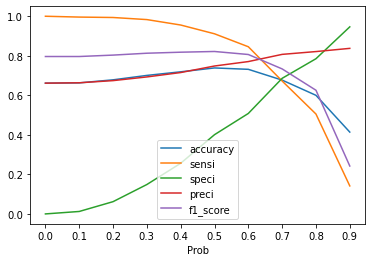

In [156]:
cutoff_df.plot.line(x='Prob', y=['accuracy','sensi','speci','preci','f1_score'], xticks = cutoff_df['Prob'])

In [160]:
# Considering Probability threshold as 0.5
y_pred_final['final_predicted'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.5 else 0)

In [161]:
# Accuracy
metrics.accuracy_score(y_pred_final['Attrition'], y_pred_final['final_predicted'])

0.7384615384615385

In [162]:
# F1 Score
metrics.f1_score(y_pred_final['Attrition'], y_pred_final['final_predicted'])

0.8217349857006673